<a href="https://colab.research.google.com/github/23f1000642/Incremental-learning-for-CNN/blob/main/CNN_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
import torchvision
from torchvision import  datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import copy

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_data = datasets.FashionMNIST('.data',train = True, download= True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 300kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.54MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.59MB/s]


In [ ]:
len(train_data)

60000

In [ ]:
# help(datasets.FashionMNIST)
print("Shape:",train_data.data.shape)
print("Target:",train_data.targets.shape, train_data.targets)
print("Classes:",train_data.classes)
print("Class to idx:", train_data.class_to_idx)

Shape: torch.Size([60000, 28, 28])
Target: torch.Size([60000]) tensor([9, 0, 0,  ..., 3, 0, 5])
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Class to idx: {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [ ]:
train_data[0][0]

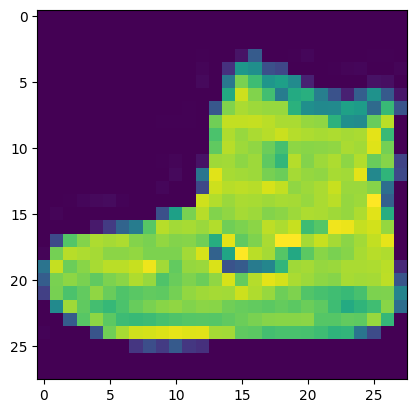

In [ ]:
plt.imshow(train_data[0][0])

In [ ]:
# dir(transforms)

In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

Normalizing them so that the pixel values are in scale

In [ ]:
transform  = transforms.ToTensor()
# pipeline = first run transform 1, then run transform 2 , transform 3
transform1 = transforms.Compose((transforms.ToTensor(),transforms.Normalize((0.5),(0.5))))

In [ ]:
type (train_data.data[0])

torch.Tensor

In [ ]:
train_data = datasets.FashionMNIST('.data', train = True, transform = transform1)


Load data

In [ ]:
train_iter = DataLoader(train_data,batch_size = 100,shuffle = True)

In [ ]:
type(train_iter)

torch.utils.data.dataloader.DataLoader

In [ ]:
for features, labels in train_iter:
  print(labels)
  break

tensor([9, 7, 4, 8, 6, 3, 2, 5, 3, 5, 3, 2, 3, 6, 4, 8, 2, 8, 9, 7, 9, 3, 5, 8,
        4, 9, 8, 8, 2, 6, 7, 3, 0, 4, 3, 0, 9, 3, 4, 9, 6, 6, 5, 4, 3, 7, 4, 7,
        6, 2, 8, 6, 6, 7, 2, 7, 0, 5, 7, 6, 3, 8, 6, 4, 5, 8, 3, 1, 0, 6, 2, 1,
        2, 6, 2, 2, 6, 8, 4, 5, 2, 7, 2, 0, 2, 1, 9, 9, 0, 7, 8, 4, 9, 3, 6, 5,
        0, 8, 3, 3])


In [ ]:
# nn.Linear()


In [ ]:
iterator = iter(train_iter)



In [ ]:
feat, lab = next (iterator)

In [ ]:
x = feat[0]

In [ ]:
x.shape

torch.Size([1, 28, 28])

# CNN


In [ ]:
conv = nn.Conv2d(1,6,5)

In [ ]:
conv.weight.shape     # these are the weight parameter tensors

torch.Size([6, 1, 5, 5])

In [ ]:
x1 = conv(x)

In [ ]:
x1.shape

torch.Size([6, 24, 24])

In [ ]:
pooling = nn.MaxPool2d(2,2)

In [ ]:
x2 = pooling(x1)
x2.shape

torch.Size([6, 12, 12])

In [ ]:
## simply coding each step in CNN sequentially
x = feat[0]
x = nn.Conv2d(1, 6, 5)(x)
x = nn.MaxPool2d(2, 2)(x)
x = nn.Conv2d(6, 6, 5)(x)
x = nn.MaxPool2d(2, 2)(x)
x.shape

torch.Size([6, 4, 4])

In [ ]:
F.relu(x)

tensor([[[0.5426, 0.5200, 0.4693, 0.4166],
         [0.3276, 0.3198, 0.3515, 0.2754],
         [0.5301, 0.4914, 0.6053, 0.6179],
         [0.6699, 0.7153, 0.6615, 0.7438]],

        [[0.1099, 0.0502, 0.0866, 0.1011],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0508, 0.1857, 0.1759, 0.2056],
         [0.5316, 0.4339, 0.4040, 0.3864]],

        [[0.3295, 0.3358, 0.3689, 0.4476],
         [0.2096, 0.1924, 0.2126, 0.3987],
         [0.0000, 0.0000, 0.0000, 0.0295],
         [0.0211, 0.0341, 0.0587, 0.0240]],

        [[0.0000, 0.1073, 0.0699, 0.0000],
         [0.1261, 0.1535, 0.2112, 0.3389],
         [0.0684, 0.0862, 0.0637, 0.1663],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.3218, 0.4180, 0.4595, 0.5492],
         [0.4336, 0.4633, 0.4342, 0.5753],
         [0.2365, 0.1725, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.3599, 0.3909, 0.3894, 0.3383],
         [0.3234, 0.2388, 0.0832, 0.1855],
         [0.0332, 0.0000, 0.0115, 0.0000],
 

Define CNN model

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()

    self.fc1 = nn.Linear(6*4*4, 80)
    self.fc2 = nn.Linear(80,20)
    self.fc3 = nn.Linear(20,10)

    #in_channels = 1 , out_channnels = 6 , kernal_size = 5

    self.conv1 = nn.Conv2d(1,6,5)
     # applying the max pooling with a kernal size 2
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,6,5)

    #THESE ABOVE ARE THE COMPONENTS OF YOUR MODERL
# FWD PASS WILL DEFINE THE ARCHITECTURE OF YOUR MODEL
  def forward(self,x):
    x = self.conv1(x)     ## 6 x 24 x 24
    x = F.relu(x)        ## 6 x 24 x 24
    x = self.pool(x)     ## 6 x 12 x 12
    x = self.conv2(x)     ## 6 x 8 x 8
    x = F.relu(x)        ## 6 x 8 x 8
    x = self.pool(x)     ## 6 x 4 x4
    x = x.view(-1,6*4*4)  ## x.flatten()  x.Flatten()
    x = self.fc1(x)       ## 1 x80
    x = F.relu(x)          ## 1 x80
    x = self.fc2(x)       ## 1x 20
    x = self.fc3(x)      ## 1x 20

    return x


In [ ]:
Model = CNN()

In [ ]:
x = feat[0]

In [ ]:
 x =  Model(x)

In [ ]:
x.shape

torch.Size([1, 10])

Training

In [ ]:
# CROSS ENTROPY LOSS = SOFTMAX + CROSSS ENTROPPY LOSS

Loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(Model.parameters(),lr = 0.1 , momentum = 0.9)

In [ ]:
#  1 EPOCH = PASS THROUGH ENTIRE DATA SET

total points = 60000

batch size = 100

total batches = 600

In [ ]:
for epoch in range(3):
  ## HERE EPOCH STARTS -- so refresh all your counters
  total_correct_pts = 0

  for features, labels in train_iter:   ## will run for 600 batches

    optimizer.zero_grad()   ## in order to remove any previous gradient info

    output = Model(features)  ## forward pass     100x10 max along dim=1

    ls = Loss(output, labels)   ## compute loss

    ls.backward()   ## back propagate the loss

    optimizer.step()  ## update the parameters

    corr = torch.argmax(output, axis = 1) == torch.as_tensor(labels)

    total_correct = torch.count_nonzero(corr)
    total_correct_pts += total_correct

  print("Accuracy: ", total_correct_pts/60000)





Accuracy:  tensor(0.8143)
Accuracy:  tensor(0.8292)
Accuracy:  tensor(0.8330)


## Analyzing the  Model's Performance usingg incremental learning


#### spliting the dataset into task 1 and task 2

In [ ]:

# Split MNIST dataset into Task 1 (digits 0-4) and Task 2 (digits 5-9)
def split_mnist():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    mnist_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)

    # Split data
    task1_data = [(img, label) for img, label in mnist_dataset if label < 5]
    task2_data = [(img, label) for img, label in mnist_dataset if label >= 5]
# task1_test_dataset = Subset(mnist_test, task1_indices)
    # Create DataLoaders
    task1_loader = DataLoader(task1_data, batch_size=100, shuffle=True)
    task2_loader = DataLoader(task2_data, batch_size=100, shuffle=True)
    return task1_loader, task2_loader

# Create DataLoaders
train_iter_task1, train_iter_task2 = split_mnist()


100%|██████████| 9.91M/9.91M [00:00<00:00, 52.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.64MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 13.1MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.42MB/s]


In [ ]:
# Verify the DataLoaders for Task 1 and Task 2
for images, labels in train_iter_task1:
    print(f"Task 1 - Batch size: {images.size(0)}, Labels: {labels[:10]}")
    break  # Check only the first batch

for images, labels in train_iter_task2:
    print(f"Task 2 - Batch size: {images.size(0)}, Labels: {labels[:10]}")
    break  # Check only the first batch


Task 1 - Batch size: 100, Labels: tensor([4, 1, 1, 0, 1, 3, 1, 2, 3, 3])
Task 2 - Batch size: 100, Labels: tensor([6, 9, 6, 9, 5, 6, 7, 9, 6, 9])


In [ ]:

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size=28*28, hidden_size=128, output_size=10):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
# Checking for GPU availability and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cpu


In [ ]:
model = SimpleNN()
model.to(device)


SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
def train_model(model, train_loader, optimizer, criterion, num_epochs=5):
    model.train()  # Set the model to training mode
    for epoch in range(num_epochs):
        total_loss = 0
        correct = 0
        total = 0
        for features, labels in train_loader:
            features, labels = features.to(device), labels.to(device)

            # Forward pass
            outputs = model(features)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate metrics
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)


        accuracy = correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}")


####### Hyperparameter tune

In [ ]:

learning_rate = 0.00005
num_epochs = 5

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


### Trainin on 1 task

In [ ]:
# Train on Task 1
print("Training on Task 1...")
train_model(model, train_iter_task1, optimizer, criterion, num_epochs=num_epochs)


Training on Task 1...
Epoch [1/5], Loss: 258.7517, Accuracy: 0.8380
Epoch [2/5], Loss: 80.7007, Accuracy: 0.9416
Epoch [3/5], Loss: 56.7758, Accuracy: 0.9519
Epoch [4/5], Loss: 47.3288, Accuracy: 0.9577
Epoch [5/5], Loss: 42.1500, Accuracy: 0.9617


## COMPUTING FISHER TECHNIQUE

In [ ]:
def compute_fisher_information(model, data_loader, criterion):

    fisher_matrix = {}
    model.eval()  # Set the model to evaluation mode

    # Initialize Fisher matrix with zeros for each parameter
    for name, param in model.named_parameters():
        fisher_matrix[name] = torch.zeros_like(param, device=device)

    print("Computing Fisher Information...")  # Debug: Track progress
    for batch_idx, (features, labels) in enumerate(data_loader):
        features, labels = features.to(device), labels.to(device)

        model.zero_grad()  # Reset gradients
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()  # Compute gradients

        # Update Fisher matrix with squared gradients
        for name, param in model.named_parameters():
            if param.grad is not None:
                fisher_matrix[name] += param.grad.pow(2) * len(labels)

        # Debug: Print intermediate results for the first batch
        if batch_idx == 0:
            print("Debug - First Batch Gradients:")
            for name, param in model.named_parameters():
                if param.grad is not None:
                    print(f"{name}: Grad Mean={param.grad.mean().item()}, Grad Std={param.grad.std().item()}")

    # Average Fisher values across all batches
    for name in fisher_matrix:
        fisher_matrix[name] /= len(data_loader.dataset)  # Normalize by dataset size

        # Debug: Print summary statistics for Fisher values
        print(f"Fisher Matrix - {name}: Mean={fisher_matrix[name].mean().item()}, "
              f"Std={fisher_matrix[name].std().item()}, "
              f"Max={fisher_matrix[name].max().item()}, "
              f"Min={fisher_matrix[name].min().item()}")

    return fisher_matrix


In [ ]:
print("Computing Fisher Information for Task 1...")
fisher_matrix_task1 = compute_fisher_information(model, train_iter_task1, criterion)
prev_params_task1 = {name: param.clone() for name, param in model.named_parameters()}
print("Fisher Information computed.")


Computing Fisher Information for Task 1...
Computing Fisher Information...
Debug - First Batch Gradients:
fc1.weight: Grad Mean=1.2104260349588003e-05, Grad Std=0.0012966817012056708
fc1.bias: Grad Mean=-2.1475007088156417e-05, Grad Std=0.0012277872301638126
fc2.weight: Grad Mean=-6.991399681410826e-10, Grad Std=0.012020401656627655
fc2.bias: Grad Mean=-7.545167823863608e-10, Grad Std=0.005920010153204203
Fisher Matrix - fc1.weight: Mean=2.3680247522861464e-06, Std=1.5529284382864716e-06, Max=9.267662790080067e-06, Min=0.0
Fisher Matrix - fc1.bias: Mean=2.5721210477058776e-06, Std=1.6827787021611584e-06, Max=8.720295227249153e-06, Min=0.0
Fisher Matrix - fc2.weight: Mean=0.00023909550509415567, Std=0.00042952026706188917, Max=0.004196864552795887, Min=0.0
Fisher Matrix - fc2.bias: Mean=6.049380681361072e-05, Std=7.70705082686618e-05, Max=0.00021167237719055265, Min=1.3915341101622403e-10
Fisher Information computed.


In [ ]:
def ewc_loss(model, fisher_matrix, prev_params, ewc_lambda):
    loss = 0
    for name, param in model.named_parameters():
        if name in fisher_matrix:
            loss += (fisher_matrix[name] * (param - prev_params[name]).pow(2)).sum()
    return ewc_lambda * loss


In [ ]:
def train_with_ewc(model, train_loader, optimizer, criterion, fisher_matrix, prev_params, ewc_lambda, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        correct = 0
        total = 0
        for features, labels in train_loader:
            features, labels = features.to(device), labels.to(device)

            # Forward pass
            outputs = model(features)
            task_loss = criterion(outputs, labels)

            #  EWC loss
            reg_loss = ewc_loss(model, fisher_matrix, prev_params, ewc_lambda)
            loss = task_loss + reg_loss

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate metrics
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

      # Print epoch results
        accuracy = correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}")


### Training on task 2 with EWC

In [ ]:
print("Training on Task 2 with EWC...")


ewc_lambda = 1000000


optimizer = torch.optim.SGD(model.parameters(), lr=0.00005)

def train_with_ewc_and_logging(
    model, train_loader, prev_params, fisher_matrix, optimizer, criterion,
    ewc_lambda, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        total_loss, ewc_loss_value, task_loss_value = 0, 0, 0
        correct, total = 0, 0

        for features, labels in train_loader:
            features, labels = features.to(device), labels.to(device)

            # Forward pass
            outputs = model(features)
            task_loss = criterion(outputs, labels)

            # Computing EWC loss
            ewc_loss = 0
            for name, param in model.named_parameters():
                if name in fisher_matrix:
                    fisher = fisher_matrix[name]
                    prev_param = prev_params[name]
                    ewc_loss += torch.sum(fisher * (param - prev_param).pow(2))

            # Total loss
            loss = task_loss + ewc_lambda * ewc_loss

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate metrics
            total_loss += loss.item()
            ewc_loss_value += ewc_loss.item()
            task_loss_value += task_loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()


        accuracy = correct / total
        print(
            f"Epoch [{epoch + 1}/{num_epochs}], "
            f"Total Loss: {total_loss:.4f}, Task Loss: {task_loss_value:.4f}, "
            f"EWC Loss: {ewc_loss_value:.4f}, Accuracy: {accuracy:.4f}"
        )


train_with_ewc_and_logging(
    model, train_iter_task2, prev_params_task1, fisher_matrix_task1,
    optimizer, criterion, ewc_lambda, num_epochs=num_epochs
)


Training on Task 2 with EWC...
Epoch [1/5], Total Loss: 4028.0728, Task Loss: 2214.9615, EWC Loss: 0.0018, Accuracy: 0.0000
Epoch [2/5], Total Loss: 11902.1564, Task Loss: 1269.1366, EWC Loss: 0.0106, Accuracy: 0.0006
Epoch [3/5], Total Loss: 22520.4428, Task Loss: 740.4959, EWC Loss: 0.0218, Accuracy: 0.0721
Epoch [4/5], Total Loss: 30347.1897, Task Loss: 545.6586, EWC Loss: 0.0298, Accuracy: 0.2504
Epoch [5/5], Total Loss: 35411.5105, Task Loss: 471.7372, EWC Loss: 0.0349, Accuracy: 0.4102


In [ ]:
def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in data_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return correct / total


In [ ]:
print("Evaluating on Task 1...")
accuracy_task1 = evaluate(model, train_iter_task1)
print(f"Accuracy on Task 1: {accuracy_task1:.4f}")

print("Evaluating on Task 2...")
accuracy_task2 = evaluate(model, train_iter_task2)
print(f"Accuracy on Task 2: {accuracy_task2:.4f}")


Evaluating on Task 1...
Accuracy on Task 1: 0.7484
Evaluating on Task 2...
Accuracy on Task 2: 0.4618
